# Анализ пространственных данных. Домашнее задание №1

Данные для выполнения заданий можно найти [здесь](https://yadi.sk/d/xBemeb0ODlhCAQ?w=1)

Дедлайн: __20 октября 2020 г. 09:00__

ФИО: `Панфилов Александр Николаевич`

Группа: `MADE-DS-32`

## Задание №1. Reading coordinates from a file and creating a geometries. 4 балла.

One of the "classical" problems in GIS is the situation where you have a set of coordinates in a file and you need to get them into a map (or into a GIS-software). Dataset `travelTimes_2015_Helsinki.txt` consist of travel times between specific locations in Helsinki Region.

1. Read the data into memory.
2. Read 4 columns `from_x`, `from_y`, `to_x`, `to_y` from the data.
3. Create two lists called __orig_points__ and __dest_points__
4. Iterate over the rows of your numpy array and add Shapely Point -objects into the __orig_points__ -list and __dest_point__ -list representing the origin locations and destination locations accordingly.

`from_x`: x-coordinate of the __origin__ location (longitude)

`from_y`: y-coordinate of the __origin__ location (latitude)

`to_x`: x-coordinate of the __destination__ location (longitude)

`to_y`: y-coordinate of the __destination__ location (latitude)

In [1]:
import pandas as pd
import numpy as np 

from shapely.geometry import Point

In [2]:
# 1.
helsinki_table = pd.read_table("travelTimes_2015_Helsinki.txt", sep=';')

In [3]:
# 2. & 3.
orig_points = list(zip(helsinki_table.from_x, helsinki_table.from_y))

dest_points = list(zip(helsinki_table.to_x, helsinki_table.to_y))

In [4]:
# 4.
orig_points = np.array([Point(point) for point in orig_points], dtype=object)

dest_points = np.array([Point(point) for point in dest_points], dtype=object)

## Задание №2. Creating LineStrings that represent the movements. 6 баллов.

Please use data from previous task:

1. Create a list called `lines`
2. Iterate over the __orig_points__ and __dest_points__ lists and create a Shapely _LineString_ -object between the origin and destination point
3. Add that line into the `lines` -list.
4. Find out what is the average (Euclidian) distance of all the origin-destination _LineStrings_ that we just created, and print it out.

In [5]:
from shapely.geometry import LineString

In [6]:
# 1. & 2. & 3.
lines = [LineString([orig, dest]) for orig, dest in zip(orig_points, dest_points)]

In [7]:
#  4.
print(f"Average distance between points (line lengths): {np.mean([line.length for line in lines])}")

Average distance between points (line lengths): 0.2150222482322721


## Задание №3. Points to map. 4 балла.

Aim is to plot a set of x and y coordinates that we should read from a `some_posts.csv`. The data has 81379 rows and consists of locations and times of social media posts inside Kruger national park in South Africa.

1. Read the data into memory.
2. Create an empty column called `geometry` where you will store shapely _Point_ objects
3. Iterate over the rows of the DataFrame (__x__ and __y__ -coordinates) and insert _Point_ objects into column `geometry`
4. Convert that DataFrame into a GeoDataFrame
5. Update the CRS for coordinate system as WGS84 (i.e. epsg code: 4326)
6. Save the data into a Shapefile called `Kruger_posts.shp`
7. Create a simple map of those points using .plot() -funtion

`lat`: y-coordinate of the post

`lon`: x-coordinate of the post

`timestamp`: Time when the post was uploaded

`userid`: userid

In [8]:
import geopandas as gpd

In [9]:
# 1.
posts_df = pd.read_table("some_posts.txt", sep=',')

In [10]:
# 2.
posts_df["geometry"] = np.nan
posts_df.head(2)

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,NaN
1,-25.499225,31.508906,2015-07-07 03:18,65281761,NaN


In [11]:
# 3.
posts_df.geometry = posts_df.apply(lambda x: Point(x.lon, x.lat), axis=1)
posts_df.head(2)

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.484633302 -24.980792492)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.508905612 -25.499224667)


In [12]:
# 4.
geo_df = gpd.GeoDataFrame(posts_df)

In [13]:
# 5.
geo_df = geo_df.set_crs(epsg=4326)
geo_df.head(2)

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.48463 -24.98079)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.50891 -25.49922)


In [14]:
# 6.
geo_df.to_file("Kruger_posts.shp", driver ="ESRI Shapefile")

## Задание №4. Movements of individual user. 6 баллов.

Please use data from previous task:

1. Group the data by `userid`
2. Create an empty GeoDataFrame
3. For each user:
   - sort the rows by `timestamp`
   - create _LineString_ objects based on the points
   - add the `geometry` and the `userid` into the GeoDataFrame you created in the last step
4. Determine the CRS of your GeoDataFrame to WGS84 (epsg code: 4326)
5. Save the movements of each user into a separate Shapefile
   - Name the output Shapefile based on the `userid` number

In [15]:
# 1.
grouped_users = geo_df.groupby("userid")

In [16]:
# 2.
gdf = gpd.GeoDataFrame(columns=["userid", "geometry"])

In [17]:
# 3. & 4. & 5.
for i, (userid, data) in enumerate(grouped_users):
    try:
        gdf.loc[i] = userid, LineString(data.sort_values('timestamp').geometry.values)
    except ValueError:
        print(f"User {userid}, have only one point!")
        continue
    gdf = gdf.set_crs(epsg=4326)
    gdf[gdf.index == i].to_file(f"./users_data/{userid}.shp", driver ="ESRI Shapefile")

User 26589, have only one point!
User 29322, have only one point!
User 42181, have only one point!
User 48971, have only one point!
User 50530, have only one point!
User 66129, have only one point!
User 74329, have only one point!
User 75914, have only one point!
User 76069, have only one point!
User 120615, have only one point!
User 133296, have only one point!
User 141256, have only one point!
User 156058, have only one point!
User 161653, have only one point!
User 177106, have only one point!
User 180146, have only one point!
User 186335, have only one point!
User 209862, have only one point!
User 228231, have only one point!
User 231302, have only one point!
User 234249, have only one point!
User 258001, have only one point!
User 270112, have only one point!
User 275948, have only one point!
User 293435, have only one point!
User 296658, have only one point!
User 314463, have only one point!
User 347572, have only one point!
User 348087, have only one point!
User 382427, have only 

User 4165832, have only one point!
User 4192252, have only one point!
User 4200814, have only one point!
User 4204495, have only one point!
User 4209524, have only one point!
User 4215695, have only one point!
User 4237591, have only one point!
User 4249474, have only one point!
User 4256671, have only one point!
User 4296906, have only one point!
User 4314276, have only one point!
User 4346211, have only one point!
User 4351434, have only one point!
User 4363812, have only one point!
User 4370329, have only one point!
User 4373418, have only one point!
User 4381929, have only one point!
User 4390173, have only one point!
User 4402715, have only one point!
User 4404832, have only one point!
User 4420069, have only one point!
User 4420558, have only one point!
User 4424530, have only one point!
User 4431864, have only one point!
User 4437152, have only one point!
User 4453535, have only one point!
User 4467950, have only one point!
User 4499689, have only one point!
User 4510314, have o

User 8198763, have only one point!
User 8200934, have only one point!
User 8236599, have only one point!
User 8239424, have only one point!
User 8248031, have only one point!
User 8258016, have only one point!
User 8260023, have only one point!
User 8264871, have only one point!
User 8314482, have only one point!
User 8385407, have only one point!
User 8391054, have only one point!
User 8398433, have only one point!
User 8419044, have only one point!
User 8429835, have only one point!
User 8434179, have only one point!
User 8443134, have only one point!
User 8452264, have only one point!
User 8457045, have only one point!
User 8463093, have only one point!
User 8482876, have only one point!
User 8483582, have only one point!
User 8513388, have only one point!
User 8514370, have only one point!
User 8519974, have only one point!
User 8546357, have only one point!
User 8571744, have only one point!
User 8592088, have only one point!
User 8612726, have only one point!
User 8637338, have o

User 11706260, have only one point!
User 11706648, have only one point!
User 11744439, have only one point!
User 11749071, have only one point!
User 11752157, have only one point!
User 11759446, have only one point!
User 11767447, have only one point!
User 11778896, have only one point!
User 11805841, have only one point!
User 11813484, have only one point!
User 11893225, have only one point!
User 11904623, have only one point!
User 11954607, have only one point!
User 11963351, have only one point!
User 11972044, have only one point!
User 11984214, have only one point!
User 12012120, have only one point!
User 12015321, have only one point!
User 12049740, have only one point!
User 12096574, have only one point!
User 12109964, have only one point!
User 12131886, have only one point!
User 12164712, have only one point!
User 12168801, have only one point!
User 12180838, have only one point!
User 12198957, have only one point!
User 12232858, have only one point!
User 12274188, have only one

User 15421162, have only one point!
User 15433157, have only one point!
User 15481495, have only one point!
User 15514035, have only one point!
User 15514945, have only one point!
User 15515790, have only one point!
User 15539104, have only one point!
User 15542103, have only one point!
User 15551068, have only one point!
User 15558140, have only one point!
User 15568382, have only one point!
User 15570091, have only one point!
User 15587582, have only one point!
User 15596051, have only one point!
User 15608961, have only one point!
User 15620370, have only one point!
User 15638090, have only one point!
User 15647422, have only one point!
User 15682098, have only one point!
User 15689481, have only one point!
User 15710129, have only one point!
User 15724608, have only one point!
User 15756121, have only one point!
User 15775408, have only one point!
User 15814085, have only one point!
User 15824163, have only one point!
User 15829105, have only one point!
User 15856775, have only one

User 19273311, have only one point!
User 19319685, have only one point!
User 19326016, have only one point!
User 19335250, have only one point!
User 19368399, have only one point!
User 19374308, have only one point!
User 19403062, have only one point!
User 19445852, have only one point!
User 19484466, have only one point!
User 19486287, have only one point!
User 19516525, have only one point!
User 19527405, have only one point!
User 19591669, have only one point!
User 19604517, have only one point!
User 19608697, have only one point!
User 19619612, have only one point!
User 19641140, have only one point!
User 19648220, have only one point!
User 19687970, have only one point!
User 19702305, have only one point!
User 19709765, have only one point!
User 19718900, have only one point!
User 19729691, have only one point!
User 19740994, have only one point!
User 19741127, have only one point!
User 19759961, have only one point!
User 19762080, have only one point!
User 19782606, have only one

User 23133531, have only one point!
User 23135469, have only one point!
User 23166142, have only one point!
User 23178519, have only one point!
User 23182575, have only one point!
User 23198128, have only one point!
User 23201400, have only one point!
User 23202276, have only one point!
User 23217507, have only one point!
User 23247027, have only one point!
User 23259007, have only one point!
User 23274982, have only one point!
User 23276085, have only one point!
User 23283021, have only one point!
User 23295907, have only one point!
User 23299655, have only one point!
User 23302464, have only one point!
User 23321995, have only one point!
User 23365312, have only one point!
User 23371840, have only one point!
User 23378598, have only one point!
User 23394322, have only one point!
User 23399105, have only one point!
User 23424854, have only one point!
User 23436811, have only one point!
User 23453838, have only one point!
User 23478546, have only one point!
User 23481053, have only one

User 27159311, have only one point!
User 27165175, have only one point!
User 27171285, have only one point!
User 27197886, have only one point!
User 27213993, have only one point!
User 27223991, have only one point!
User 27225540, have only one point!
User 27232531, have only one point!
User 27259434, have only one point!
User 27274191, have only one point!
User 27289466, have only one point!
User 27307534, have only one point!
User 27315726, have only one point!
User 27316769, have only one point!
User 27360723, have only one point!
User 27377856, have only one point!
User 27441826, have only one point!
User 27449014, have only one point!
User 27450192, have only one point!
User 27476937, have only one point!
User 27501465, have only one point!
User 27531105, have only one point!
User 27565848, have only one point!
User 27596870, have only one point!
User 27614508, have only one point!
User 27626402, have only one point!
User 27650023, have only one point!
User 27697617, have only one

User 31823750, have only one point!
User 31842655, have only one point!
User 31844777, have only one point!
User 31851012, have only one point!
User 31869213, have only one point!
User 31913183, have only one point!
User 31978184, have only one point!
User 31979070, have only one point!
User 31998203, have only one point!
User 32019716, have only one point!
User 32063425, have only one point!
User 32102337, have only one point!
User 32108767, have only one point!
User 32134062, have only one point!
User 32157636, have only one point!
User 32185854, have only one point!
User 32193042, have only one point!
User 32224212, have only one point!
User 32231757, have only one point!
User 32233095, have only one point!
User 32243127, have only one point!
User 32245562, have only one point!
User 32258853, have only one point!
User 32281684, have only one point!
User 32292993, have only one point!
User 32297908, have only one point!
User 32325152, have only one point!
User 32352584, have only one

User 35982174, have only one point!
User 35982530, have only one point!
User 35986427, have only one point!
User 36022191, have only one point!
User 36035171, have only one point!
User 36072289, have only one point!
User 36075286, have only one point!
User 36117575, have only one point!
User 36133043, have only one point!
User 36144063, have only one point!
User 36187381, have only one point!
User 36187581, have only one point!
User 36203130, have only one point!
User 36247165, have only one point!
User 36253138, have only one point!
User 36256508, have only one point!
User 36269583, have only one point!
User 36291226, have only one point!
User 36291756, have only one point!
User 36292762, have only one point!
User 36322020, have only one point!
User 36351206, have only one point!
User 36363162, have only one point!
User 36392349, have only one point!
User 36403387, have only one point!
User 36414630, have only one point!
User 36418875, have only one point!
User 36437920, have only one

User 39537716, have only one point!
User 39596874, have only one point!
User 39601792, have only one point!
User 39620807, have only one point!
User 39621665, have only one point!
User 39645820, have only one point!
User 39665567, have only one point!
User 39674194, have only one point!
User 39674655, have only one point!
User 39697316, have only one point!
User 39703089, have only one point!
User 39717296, have only one point!
User 39743923, have only one point!
User 39760784, have only one point!
User 39762897, have only one point!
User 39767590, have only one point!
User 39792416, have only one point!
User 39797135, have only one point!
User 39828877, have only one point!
User 39833936, have only one point!
User 39834278, have only one point!
User 39863339, have only one point!
User 39886244, have only one point!
User 39893970, have only one point!
User 39901014, have only one point!
User 39954126, have only one point!
User 39963035, have only one point!
User 40011302, have only one

User 43496875, have only one point!
User 43508792, have only one point!
User 43513081, have only one point!
User 43568536, have only one point!
User 43569491, have only one point!
User 43586804, have only one point!
User 43631641, have only one point!
User 43637325, have only one point!
User 43664984, have only one point!
User 43688128, have only one point!
User 43695277, have only one point!
User 43698565, have only one point!
User 43725275, have only one point!
User 43788218, have only one point!
User 43809279, have only one point!
User 43892066, have only one point!
User 43905704, have only one point!
User 43918089, have only one point!
User 43940775, have only one point!
User 43953186, have only one point!
User 43959266, have only one point!
User 43960647, have only one point!
User 43975610, have only one point!
User 43978297, have only one point!
User 43992021, have only one point!
User 44020684, have only one point!
User 44035120, have only one point!
User 44067857, have only one

User 47658193, have only one point!
User 47670361, have only one point!
User 47688834, have only one point!
User 47713365, have only one point!
User 47733447, have only one point!
User 47796803, have only one point!
User 47825124, have only one point!
User 47832741, have only one point!
User 47833165, have only one point!
User 47854221, have only one point!
User 47864939, have only one point!
User 47876409, have only one point!
User 47897256, have only one point!
User 47920135, have only one point!
User 47957224, have only one point!
User 47964219, have only one point!
User 47964835, have only one point!
User 47998024, have only one point!
User 48007124, have only one point!
User 48011602, have only one point!
User 48021732, have only one point!
User 48054684, have only one point!
User 48069823, have only one point!
User 48098700, have only one point!
User 48099329, have only one point!
User 48107593, have only one point!
User 48108747, have only one point!
User 48113236, have only one

User 51428611, have only one point!
User 51428976, have only one point!
User 51437904, have only one point!
User 51461307, have only one point!
User 51477644, have only one point!
User 51477843, have only one point!
User 51485328, have only one point!
User 51493939, have only one point!
User 51544149, have only one point!
User 51582911, have only one point!
User 51611163, have only one point!
User 51616223, have only one point!
User 51633147, have only one point!
User 51653685, have only one point!
User 51656687, have only one point!
User 51666967, have only one point!
User 51675231, have only one point!
User 51731413, have only one point!
User 51746388, have only one point!
User 51746854, have only one point!
User 51747888, have only one point!
User 51774576, have only one point!
User 51794079, have only one point!
User 51795782, have only one point!
User 51804377, have only one point!
User 51816931, have only one point!
User 51844200, have only one point!
User 51902856, have only one

User 55026102, have only one point!
User 55095659, have only one point!
User 55106298, have only one point!
User 55120225, have only one point!
User 55127837, have only one point!
User 55128155, have only one point!
User 55172846, have only one point!
User 55208516, have only one point!
User 55222648, have only one point!
User 55268008, have only one point!
User 55325997, have only one point!
User 55332513, have only one point!
User 55354019, have only one point!
User 55358462, have only one point!
User 55370263, have only one point!
User 55390669, have only one point!
User 55433053, have only one point!
User 55448018, have only one point!
User 55454637, have only one point!
User 55460329, have only one point!
User 55460687, have only one point!
User 55461288, have only one point!
User 55487800, have only one point!
User 55496000, have only one point!
User 55506563, have only one point!
User 55519674, have only one point!
User 55521582, have only one point!
User 55522561, have only one

User 59001347, have only one point!
User 59004160, have only one point!
User 59005785, have only one point!
User 59011877, have only one point!
User 59013434, have only one point!
User 59017943, have only one point!
User 59028604, have only one point!
User 59034820, have only one point!
User 59067181, have only one point!
User 59067188, have only one point!
User 59085498, have only one point!
User 59099476, have only one point!
User 59115504, have only one point!
User 59150137, have only one point!
User 59182414, have only one point!
User 59201639, have only one point!
User 59216523, have only one point!
User 59219168, have only one point!
User 59235841, have only one point!
User 59275401, have only one point!
User 59283353, have only one point!
User 59297646, have only one point!
User 59304061, have only one point!
User 59307091, have only one point!
User 59351192, have only one point!
User 59359752, have only one point!
User 59372787, have only one point!
User 59396738, have only one

User 62680665, have only one point!
User 62696793, have only one point!
User 62709795, have only one point!
User 62725700, have only one point!
User 62730336, have only one point!
User 62733423, have only one point!
User 62760935, have only one point!
User 62761927, have only one point!
User 62766362, have only one point!
User 62794608, have only one point!
User 62810832, have only one point!
User 62812554, have only one point!
User 62822011, have only one point!
User 62829457, have only one point!
User 62877566, have only one point!
User 62891878, have only one point!
User 62892391, have only one point!
User 62898432, have only one point!
User 62926995, have only one point!
User 62987584, have only one point!
User 62990750, have only one point!
User 63007261, have only one point!
User 63013350, have only one point!
User 63050076, have only one point!
User 63064294, have only one point!
User 63071952, have only one point!
User 63080360, have only one point!
User 63086999, have only one

User 66098353, have only one point!
User 66115835, have only one point!
User 66134734, have only one point!
User 66144665, have only one point!
User 66146680, have only one point!
User 66151523, have only one point!
User 66155435, have only one point!
User 66174213, have only one point!
User 66177889, have only one point!
User 66192085, have only one point!
User 66197710, have only one point!
User 66216374, have only one point!
User 66216634, have only one point!
User 66237553, have only one point!
User 66257411, have only one point!
User 66266801, have only one point!
User 66280226, have only one point!
User 66304431, have only one point!
User 66312010, have only one point!
User 66333392, have only one point!
User 66348708, have only one point!
User 66364849, have only one point!
User 66370882, have only one point!
User 66381953, have only one point!
User 66384570, have only one point!
User 66386174, have only one point!
User 66391902, have only one point!
User 66409800, have only one

User 70198291, have only one point!
User 70278557, have only one point!
User 70307334, have only one point!
User 70308527, have only one point!
User 70316969, have only one point!
User 70322179, have only one point!
User 70331430, have only one point!
User 70392997, have only one point!
User 70434757, have only one point!
User 70442441, have only one point!
User 70452449, have only one point!
User 70465601, have only one point!
User 70471844, have only one point!
User 70473122, have only one point!
User 70474443, have only one point!
User 70498127, have only one point!
User 70526343, have only one point!
User 70536038, have only one point!
User 70545926, have only one point!
User 70553406, have only one point!
User 70569011, have only one point!
User 70569371, have only one point!
User 70586604, have only one point!
User 70666241, have only one point!
User 70673844, have only one point!
User 70679291, have only one point!
User 70717107, have only one point!
User 70728358, have only one

User 74159899, have only one point!
User 74170831, have only one point!
User 74233667, have only one point!
User 74263953, have only one point!
User 74268525, have only one point!
User 74291659, have only one point!
User 74343408, have only one point!
User 74344851, have only one point!
User 74356879, have only one point!
User 74358431, have only one point!
User 74368754, have only one point!
User 74414992, have only one point!
User 74434751, have only one point!
User 74436341, have only one point!
User 74436649, have only one point!
User 74445529, have only one point!
User 74449167, have only one point!
User 74474720, have only one point!
User 74512345, have only one point!
User 74531623, have only one point!
User 74538209, have only one point!
User 74541592, have only one point!
User 74542727, have only one point!
User 74554694, have only one point!
User 74566633, have only one point!
User 74602484, have only one point!
User 74602857, have only one point!
User 74646857, have only one

User 77733552, have only one point!
User 77743717, have only one point!
User 77785272, have only one point!
User 77799352, have only one point!
User 77828654, have only one point!
User 77831012, have only one point!
User 77833670, have only one point!
User 77839107, have only one point!
User 77863242, have only one point!
User 77894593, have only one point!
User 77899071, have only one point!
User 77904251, have only one point!
User 77904851, have only one point!
User 77924351, have only one point!
User 77992219, have only one point!
User 77993461, have only one point!
User 77999414, have only one point!
User 78001315, have only one point!
User 78055593, have only one point!
User 78058701, have only one point!
User 78063078, have only one point!
User 78077175, have only one point!
User 78101637, have only one point!
User 78111831, have only one point!
User 78133752, have only one point!
User 78172513, have only one point!
User 78181214, have only one point!
User 78188475, have only one

User 81447570, have only one point!
User 81465526, have only one point!
User 81491131, have only one point!
User 81509253, have only one point!
User 81550390, have only one point!
User 81562938, have only one point!
User 81604986, have only one point!
User 81605560, have only one point!
User 81618533, have only one point!
User 81620943, have only one point!
User 81641015, have only one point!
User 81655034, have only one point!
User 81657517, have only one point!
User 81667993, have only one point!
User 81670571, have only one point!
User 81696352, have only one point!
User 81724752, have only one point!
User 81729375, have only one point!
User 81737286, have only one point!
User 81777998, have only one point!
User 81808294, have only one point!
User 81808420, have only one point!
User 81830585, have only one point!
User 81834864, have only one point!
User 81839396, have only one point!
User 81850741, have only one point!
User 81889218, have only one point!
User 81911358, have only one

User 85183729, have only one point!
User 85202049, have only one point!
User 85212162, have only one point!
User 85214148, have only one point!
User 85248882, have only one point!
User 85259948, have only one point!
User 85267467, have only one point!
User 85283618, have only one point!
User 85293352, have only one point!
User 85308708, have only one point!
User 85335453, have only one point!
User 85339500, have only one point!
User 85353754, have only one point!
User 85373767, have only one point!
User 85383781, have only one point!
User 85399355, have only one point!
User 85410456, have only one point!
User 85428284, have only one point!
User 85436155, have only one point!
User 85459181, have only one point!
User 85469544, have only one point!
User 85490646, have only one point!
User 85498740, have only one point!
User 85521332, have only one point!
User 85548694, have only one point!
User 85587862, have only one point!
User 85597610, have only one point!
User 85601067, have only one

User 89024599, have only one point!
User 89024737, have only one point!
User 89034915, have only one point!
User 89057341, have only one point!
User 89062204, have only one point!
User 89084701, have only one point!
User 89093963, have only one point!
User 89101917, have only one point!
User 89112776, have only one point!
User 89136452, have only one point!
User 89136454, have only one point!
User 89143106, have only one point!
User 89151602, have only one point!
User 89155825, have only one point!
User 89173626, have only one point!
User 89177915, have only one point!
User 89198321, have only one point!
User 89200261, have only one point!
User 89201478, have only one point!
User 89221731, have only one point!
User 89241450, have only one point!
User 89288820, have only one point!
User 89330910, have only one point!
User 89334901, have only one point!
User 89355379, have only one point!
User 89367455, have only one point!
User 89393120, have only one point!
User 89409492, have only one

User 92564029, have only one point!
User 92599088, have only one point!
User 92619323, have only one point!
User 92620206, have only one point!
User 92629886, have only one point!
User 92670114, have only one point!
User 92677196, have only one point!
User 92713577, have only one point!
User 92725700, have only one point!
User 92796641, have only one point!
User 92799176, have only one point!
User 92804513, have only one point!
User 92820054, have only one point!
User 92847419, have only one point!
User 92851443, have only one point!
User 92881991, have only one point!
User 92883519, have only one point!
User 92922131, have only one point!
User 92929164, have only one point!
User 92932853, have only one point!
User 92938031, have only one point!
User 92961162, have only one point!
User 92970951, have only one point!
User 93009985, have only one point!
User 93022619, have only one point!
User 93030783, have only one point!
User 93033261, have only one point!
User 93048545, have only one

User 96592317, have only one point!
User 96649502, have only one point!
User 96651220, have only one point!
User 96657645, have only one point!
User 96679432, have only one point!
User 96713049, have only one point!
User 96753210, have only one point!
User 96756859, have only one point!
User 96764259, have only one point!
User 96789495, have only one point!
User 96797168, have only one point!
User 96798840, have only one point!
User 96810899, have only one point!
User 96819764, have only one point!
User 96822510, have only one point!
User 96823633, have only one point!
User 96916097, have only one point!
User 96918951, have only one point!
User 96920599, have only one point!
User 96926419, have only one point!
User 96977129, have only one point!
User 96993902, have only one point!
User 96994550, have only one point!
User 97016198, have only one point!
User 97039108, have only one point!
User 97050697, have only one point!
User 97059468, have only one point!
User 97061728, have only one

## Задание №5. Join accessibility datasets into a grid and visualize them by using a classifier. 4 балла.

A dataset from `dataE4.zip` includes 7 text files containing data about accessibility in Helsinki Region and a Shapefile that contains a Polygon grid that can be used to visualize and analyze the data spatially. The datasets are:

 - `travel_times_to_[XXXXXXX]_[NAME-OF-THE-CENTER].txt` including travel times and road network distances to specific shopping center
 - `MetropAccess_YKR_grid_EurefFIN.shp` including the Polygon grid with __YKR_ID__ column that can be used to join the grid with the accessibility data
 
Find out more about the data [here](https://blogs.helsinki.fi/accessibility/helsinki-region-travel-time-matrix-2015/)

1. Read those travel_time data files (one by one) with Pandas and select only following columns from them:

 - `pt_r_tt`
 - `car_r_t`
 - `from_id`
 - `to_id`


2. Visualize the classified travel times (Public transport AND Car) of at least one of the shopping centers using any classification method (see [PySAL](https://pysal.org/) for more details upon classification methods). You need to classify the data into a new column in your GeoDataFrame.

In [18]:
import os
import matplotlib.pyplot as plt

import mapclassify as mc
import libpysal as lps

In [19]:
#  1.
pd_files = []
extracted_columns = ["pt_r_tt", "car_r_t", "from_id", "to_id"]

for file in os.listdir("./dataE4/dataE4"):
    if "TravelTimes" in file:
        table = pd.read_table("./dataE4/dataE4/"+file, sep=';')[extracted_columns]
        pd_files.append(table)

In [20]:
map_hel = gpd.read_file("./dataE4/dataE4/MetropAccess_YKR_grid_EurefFIN.shp")
map_hel.head()

,x,y,YKR_ID,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [21]:
def fill_nans(sample, column):
    means_for_nan = {}
    nan_areas = sample[sample[column] == -1][["YKR_ID", "x", "y"]]
    for  YKR_ID_, x_, y_ in nan_areas.values:
        sample_2 = sample[~sample.YKR_ID.isin(nan_areas.YKR_ID)].copy()[["YKR_ID", "x", "y", column]]
        sample_2['dist'] = np.sqrt(np.sum(np.square(sample_2[['x', 'y']].values - np.array([x_, y_])), axis=1))
        means_for_nan[YKR_ID_] = sample_2.sort_values('dist').head(10)[column].mean()

    sample[column] = sample.apply(lambda x: x[column] if not means_for_nan.get(x.YKR_ID) else means_for_nan[x.YKR_ID], axis=1)
    return sample

In [24]:
def make_plots(pd_files, data_index, column, lags=10):
    
    dummy = "public transport" if column == "pt_r_tt" else "car"
    sample = map_hel.merge(pd_files[data_index][["from_id", column]], left_on='YKR_ID', right_on='from_id').drop(columns=['from_id'])
    
    sample.plot(column=column, scheme='Quantiles', k=lags, figsize=(10,10), legend=True)
    plt.title(f"Heat map of required time to travel to 5878070 (Quintiles) ({dummy}) with NaN's")
    plt.show()
    
    # Dealing with nan's
    sample = fill_nans(sample, column)
    
    sample.plot(column=column, scheme='Quantiles', k=lags, figsize=(10,10), legend=True)
    plt.title(f"Heat map of required time to travel to 5878070 (Quintiles) ({dummy}) without NaN's")
    plt.show()
    
    df = sample
    wq =  lps.weights.Queen.from_dataframe(df)
    wq.transform = 'r'

    y = df[column]
    ylag = lps.weights.lag_spatial(wq, y)

    ylagq5 = mc.Quantiles(ylag, k=lags)
    
    df.assign(cl=ylagq5.yb).plot(column='cl',  figsize=(10,10), cmap='GnBu', categorical=True, k=lags, linewidth=0.1, edgecolor='white')
    plt.title(f"Classes of a time required to travel to 5878070 (Quintiles) ({dummy})")
    plt.show()

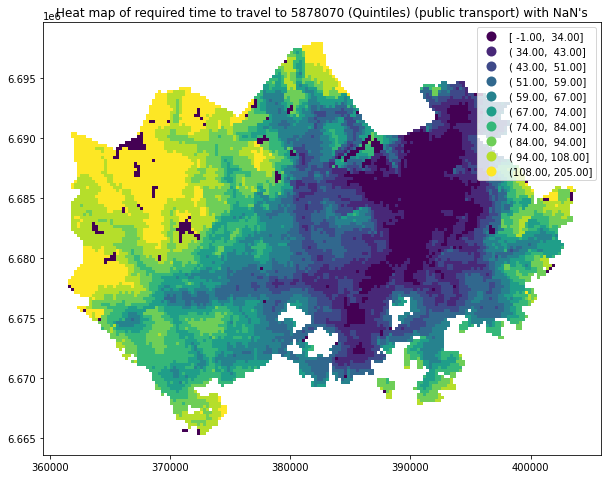

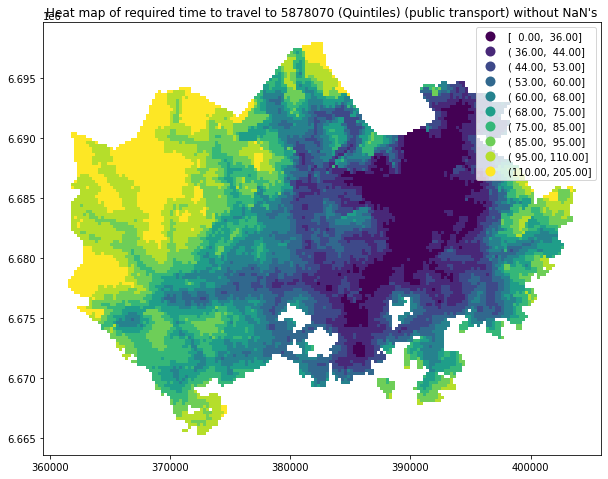

E:\Anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


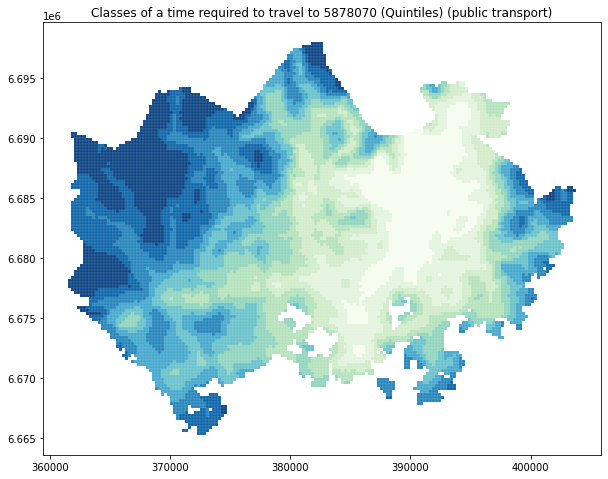

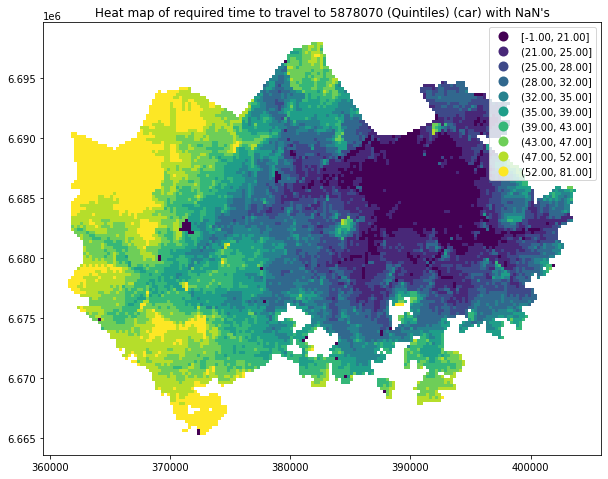

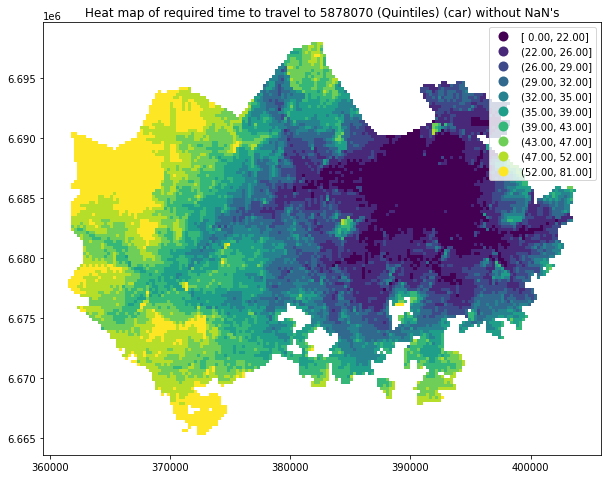

E:\Anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


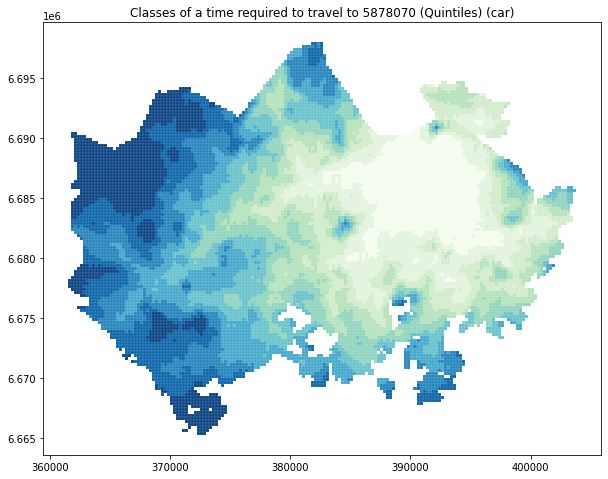

In [25]:
make_plots(pd_files, 1, "pt_r_tt", lags=10)
make_plots(pd_files, 1, "car_r_t", lags=10)

## Задание №6. Calculate and visualize the dominance areas of shopping centers. 6 баллов.

Please use data from previous task. The aim is to define the dominance area for each of those shopping centers based on travel time:

1. Iterate over the accessibility files one by one
2. Rename the travel time columns so that they can be identified
   - you can include e.g. the `to_id` number as part of the column name (then the column name could be e.g. "pt_r_tt_5987221")
3. Join those columns into `MetropAccess_YKR_grid_EurefFIN.shp` where __YKR_ID__ in the grid corresponds to `from_id` in the travel time data file. At the end you should have a GeoDataFrame with different columns show the travel times to different shopping centers.
4. For each row find out the __minimum__ value of __all__ `pt_r_tt_XXXXXX` columns and insert that value into a new column called `min_time_pt`. You can now also parse the `to_id` value from the column name (i.e. parse the last number-series from the column text) that had the minimum travel time value and insert that value as a number into a column called `dominant_service`. In this, way are able to determine the "closest" shopping center for each grid cell and visualize it either by travel times or by using the __YKR_ID__ number of the shopping center (i.e. that number series that was used in column name).
5. Visualize the travel times of our `min_time_pt` column using any classifier.
6. Visualize also the values in `dominant_service` column (no need to use any specific classifier). Notice that the value should be a number. If it is still as text, you need to convert it first.

In [26]:
col = "pt_r_tt"
cols = ["from_id", "to_id", col]
added_cols = []
for file in pd_files:
    _id = file.loc[0, "to_id"]
    added_cols.append(col+str(_id))
    map_hel = map_hel.merge(file[cols].rename(columns={col : col+str(_id)}), left_on="YKR_ID", right_on="from_id").drop(columns=["from_id", "to_id"])

In [27]:
for col in added_cols:
    map_hel = fill_nans(map_hel, col)

In [28]:
map_hel["min_time_pt"] = map_hel[added_cols].min(axis=1)

In [29]:
map_hel.head()

,x,y,YKR_ID,geometry,pt_r_tt5878070,pt_r_tt5878087,pt_r_tt5902043,pt_r_tt5944003,pt_r_tt5975373,pt_r_tt5978593,pt_r_tt5980260,min_time_pt
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",131.0,134.0,121.0,157.0,137.0,166.0,147.0,121.0
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",129.0,130.0,115.0,154.0,134.0,164.0,142.0,115.0
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",129.0,130.0,115.0,154.0,134.0,164.0,142.0,115.0
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",138.0,140.0,126.0,163.0,144.0,174.0,153.0,126.0
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",115.0,118.0,103.0,142.0,121.0,150.0,130.0,103.0


E:\Anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


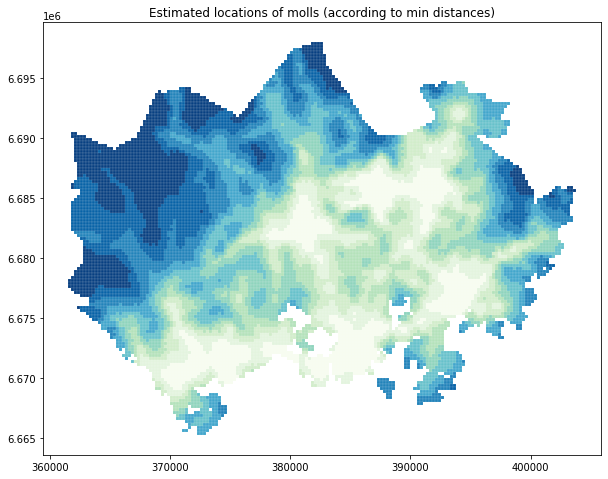

In [30]:
df = map_hel
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

y = df["min_time_pt"]
ylag = lps.weights.lag_spatial(wq, y)

ylagq5 = mc.Quantiles(ylag, k=10)

df.assign(cl=ylagq5.yb).plot(column='cl',  figsize=(10,10), cmap='GnBu', categorical=True, k=10, linewidth=0.1, edgecolor='white')
plt.title(f"Estimated locations of molls (according to min distances)")
plt.show()

In [33]:
map_hel["dominant_service"] = np.argmin(map_hel[added_cols].values, axis=1)
map_hel["dominant_service"] = map_hel["dominant_service"].apply(lambda x: added_cols[x][-8:])

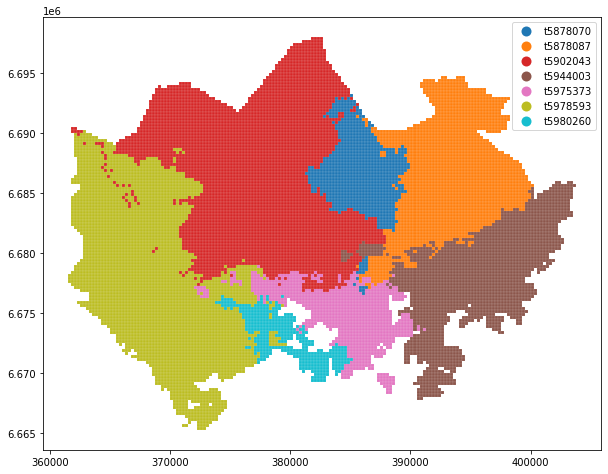

In [34]:
df.plot(column="dominant_service", categorical=True, k=10,linewidth=0.1, edgecolor='white', legend=True,  figsize=(10,10))
plt.show()

### Комментарий

Огромной сложностью было поставить все исходные пакеты (по какой-то причине они не ставились через pip или pipwin, нужно было искать конкретные бинарники, и более того, эти библиотеки нужно ставить было в конкретном порядке (gdal, fasterio, geopandas и т.п.)) Было бы неплохо в следующий раз, если понадабятся новые ресурсы, дать небольшой гайд, как их поставить.

Я не совсем понял 5ый и 6ой пункт (видимо траблы с английским), поэтому пришлось немного додумать, что надо сделать(